# Compute performance metrics for the given Y and Y_score without sklearn

In [ ]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages
import gdown

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
data = pd.read_csv('/content/5_a.csv')#,delim_whitespace=True, header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       10100 non-null  float64
 1   proba   10100 non-null  float64
dtypes: float64(2)
memory usage: 157.9 KB


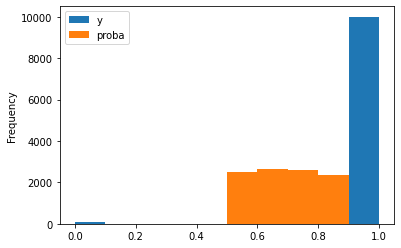

In [ ]:
data.plot.hist( )

In [ ]:
g_truths = data.y.values

In [ ]:
probs = data.proba.values
preds = np.where(probs<0.5 , 0,1)


In [ ]:
def confusion_matrix(truths, preds, n_classes = 2):
  array = np.zeros((n_classes,n_classes))
  #[(0,0):'tn',(0,1):'fn', (1,0) : 'fp', (1,2):'tp']
  k = preds + truths
  p = preds - truths
  tn = len(truths) - np.count_nonzero(k)
  fn = np.count_nonzero(np.where(p<0, 1, 0))
  fp = np.count_nonzero(np.where(p==1,1,0))
  tp = np.count_nonzero(np.where(k==2, 1, 0))
  pion = 0 
  rcall = 0
  f1 =0
  try:  
    pion = tp/(tp+fp)
    rcall = tp/(tp+fn)
  except ZeroDivisionError:
    pion = 'all the predicted pts are non_zero'
    f1 = 'all the predicted pts are non_zero'
  else:
    f1 = 2*pion*rcall/(pion+rcall)

  accuracy = (tp+tn)/len(truths)

  array[0,0] = tn
  array[0,1] = fn
  array[1,0] = fp
  array[1,1] = tp

  return array, pion, rcall, f1, accuracy


def tpr_fpr(truths,preds):
  k = preds + truths
  p = preds - truths
  tn = len(truths) - np.count_nonzero(k)
  fn = np.count_nonzero(np.where(p<0, 1, 0))
  fp = np.count_nonzero(np.where(p==1,1,0))
  tp = np.count_nonzero(np.where(k==2, 1, 0))

  tpr = tp/(tp+fn)
  fpr = fp/(fp + tn)

  return tpr, fpr


In [ ]:
a = confusion_matrix(truths = g_truths, preds = preds)

In [ ]:
print("confusion matrix regarding 5_a is : ", a[0])
print("precison regarding 5_a is: ", a[1])
print("recall regarding 5_a is : ", a[2])
print("f1 score regarding 5_a is : ", a[3])
print("accuracy regarding 5a is : ", a[4])

#note the cases in imbalanced data

confusion matrix regarding 5_a is :  [[    0.     0.]
 [  100. 10000.]]
precison regarding 5_a is:  0.9900990099009901
recall regarding 5_a is :  1.0
f1 score regarding 5_a is :  0.9950248756218906
accuracy regarding 5a is :  0.9900990099009901


In [ ]:
def auc_cal(truths, probs):
  set_probs = set(probs)
  set_probs = list(set_probs)
  set_probs = np.sort(set_probs)
  
  tpr_lst = []
  fpr_lst = []

  for prob in set_probs:
    thres = prob
    preds = np.where(probs <= thres, 0, 1 )
    tpr_fpr_tuple = tpr_fpr(truths, preds)
    tpr_lst.append(tpr_fpr_tuple[0])
    fpr_lst.append(tpr_fpr_tuple[1])

  auc = np.trapz(sorted(tpr_lst), sorted(fpr_lst))

  return auc




In [ ]:
print("AUC regarding 5_a is :",auc_cal(g_truths,probs))

AUC regarding 5_a is : 0.48829900000000004


<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code
data_b =pd.read_csv('/content/5_b.csv')
data_b.head()

probs_b = data_b.proba.values
preds_b = np.where(probs_b<0.5 , 0,1)

(array, pion, recall,f1, accuracy) = confusion_matrix(truths=data_b.y.values, preds=preds_b)#[array,pion,recall,f1,accuracy]
print("confusion_matrix regards to 5_b.csv is ", array)
print("precision regarding 5_b is ",pion)
print("recall regarding 5_b is ",recall)
print("f1_score regarding 5_b is ",f1)
print("accuracy regarding 5_b is ",accuracy)


auc_b = auc_cal(truths= data_b.y.values, probs= data_b.proba.values)
print("auc regarding 5_b is ",auc_b)

confusion_matrix regards to 5_b.csv is  [[9761.   45.]
 [ 239.   55.]]
precision regarding 5_b is  0.1870748299319728
recall regarding 5_b is  0.55
f1_score regarding 5_b is  0.2791878172588833
accuracy regarding 5_b is  0.9718811881188119
auc regarding 5_b is  0.9376570000000001


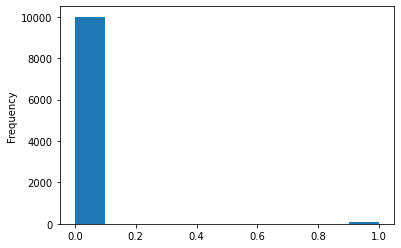

In [ ]:
#why such result, that precision and recall are so less and still accurac and auc are so high?
data_b.y.plot.hist()
#observation == we notice that the ground_truths are so disproportionate. imbalanced hugely towards zero class


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       2852 non-null   int64  
 1   prob    2852 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 44.7 KB


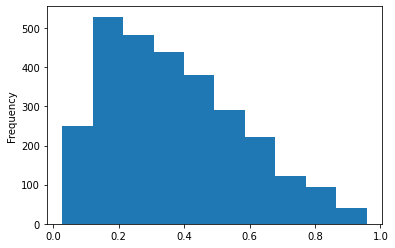

In [ ]:
 # write your code
 df = pd.read_csv("5_c.csv")
 df.info()
 df['prob'].plot.hist()

   prob
y      
0  1805
1  1047


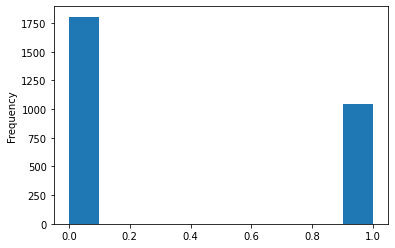

In [ ]:
df.y.plot.hist()
print(df.groupby('y').count())

#print(df.y.value_counts())

In [ ]:
def cal_A(truths,preds):
  #k = preds + truths
  p = preds - truths
  #tn = len(truths) - np.count_nonzero(k)
  fn = np.count_nonzero(np.where(p==-1, 1, 0))
  fp = np.count_nonzero(np.where(p==1,1,0))
  #tp = np.count_nonzero(np.where(k==2, 1, 0))

  #tpr = tp/(tp+fn)
  #fpr = fp/(fp + tn)
  A = 500*fn + 100*fp
  return A


In [ ]:
def threshold(truths, probs):
  set_probs = set(probs)
  set_probs = list(set_probs)
  set_probs = np.sort(set_probs)
  
  A_lst = []
  
  for prob in set_probs:
    thres = prob
    preds = np.where(probs <= thres, 0, 1 )
    a_val = cal_A(truths, preds)
    A_lst.append(a_val)
    
  k = np.argmin(A_lst)
  threshold = set_probs[k]

  return threshold, A_lst, set_probs

In [ ]:
(thresold, A_list, set_probs) = threshold(df.y.values, df.prob.values)
print("threshold regarding 5_c, where A(our error measure) is minimum is ",thresold)

A_lst = A_list
probabs = set_probs
# using A_lst and probabs, we can plot and see that the threshold makes sense

threshold regarding 5_c, where A(our error measure) is minimum is  0.22987164436159915


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
my_df = pd.read_csv('5_d.csv')
my_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157200 entries, 0 to 157199
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y       157200 non-null  float64
 1   pred    157200 non-null  float64
dtypes: float64(2)
memory usage: 2.4 MB


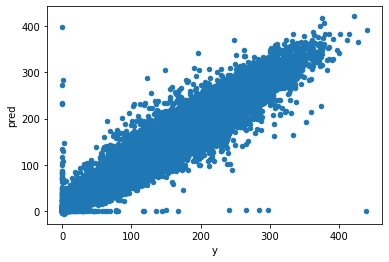

In [ ]:
my_df.plot.scatter(x='y', y ='pred')

In [ ]:
def mse_mape(truths, preds):
  #n = len(truths)
  tot = preds - truths.mean()
  tot = tot**2
  k = np.abs(preds - truths)
  mse_comp = k**2
  mse = mse_comp.mean()

  mape = k.sum()/preds.sum()

  ss_res = mse_comp.sum()
  ss_tot = tot.sum()

  r_sq = 1 - (ss_res/ss_tot)

  return mse, mape, r_sq






In [ ]:
(mse, mape, r_sq) = mse_mape(my_df.y.values, my_df.pred.values)

print("mean sq error regarding 5_d is ",mse)
print("modified mean abs percentage error regarding 5_d is ",mape)
print("R^2 regarding 5_d is ",r_sq)

mean sq error regarding 5_d is  177.16569974554707
modified mean abs percentage error regarding 5_d is  0.12927250737711507
R^2 regarding 5_d is  0.9544134826849549
